In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import dtale
import matplotlib.pyplot as plt

In [26]:
df_berry = pd.read_csv('../data/berry_data_cleaned.csv')
df_weather = pd.read_csv('../data/weather_data.csv')
df_altitudes = pd.read_json("../data/altitudes.json")


In [27]:
df_berry_weather = pd.merge(df_berry, df_weather, on="latlon", how="left")

In [28]:
df_berry_weather['latlon'] = df_berry_weather['lat_x'].astype(str) + "-" + df_berry_weather['lon_x'].astype(str) + "-" +df_berry_weather['observation_date']+"-"+df_berry_weather['berry_x']
df_altitudes['latlon'] = df_altitudes['lat_x'].astype(str) + "-" + df_altitudes['lon_x'].astype(str) + "-" +df_altitudes['observation_date']+"-"+df_altitudes['berry_x']

In [29]:
# drop all other columns so that we only have latlon and altitude left in the DataFrame
df_altitudes = df_altitudes.drop("lat_x", axis=1)
df_altitudes = df_altitudes.drop("lon_x", axis=1)
df_altitudes = df_altitudes.drop("berry_x", axis=1)
df_altitudes = df_altitudes.drop("observation_date", axis=1)

In [30]:
# drop duplicate altitudes and merge with df_everything
df_altitudes = df_altitudes.drop_duplicates()
df_berry_weather= pd.merge(df_berry_weather, df_altitudes, on="latlon", how="left")

In [31]:
# fix latlon to 10 decimals, so that they match with precipitation data
df_berry_weather['latlon'] = round(df_berry_weather['lat_x'], 10).astype(str) + "-" + round(df_berry_weather['lon_x'], 10).astype(str) + "-" +df_berry_weather['observation_date']+"-"+df_berry_weather['berry_x']
df_precip = pd.read_csv("../data/rains.csv", index_col=0)
df_berry_weather = pd.merge(df_berry_weather, df_precip, on='latlon', how="left")

precip – the amount of liquid precipitation that fell or is predicted to fall in the period. This includes the liquid-equivalent amount of any frozen precipitation such as snow or ice.

precipcover (days only) – the proportion of hours where there was non-zero precipitation

precipprob (forecast only) – the likelihood of measurable precipitation ranging from 0% to 100%

In [32]:
df_berry_weather.drop(['week_number', 'xy', 'latlon', 'feelslikemax', 
                       'feelslikemin', 'feelslike', 'visibility', 'lat_x', 'lon_y' , 'solarradiation', 'solarenergy', 'uvindex', 
                       'year-month-day_y', 'berry_y', 'observation_date', 'year-month-day_x', 'month', 'day', 'moonphase', 'pressure'], axis=1, inplace=True)
df_berry_weather.rename(columns={'berry_x':'berry_type'}, inplace=True)

In [33]:
dtale.show(df_berry_weather).open_browser()

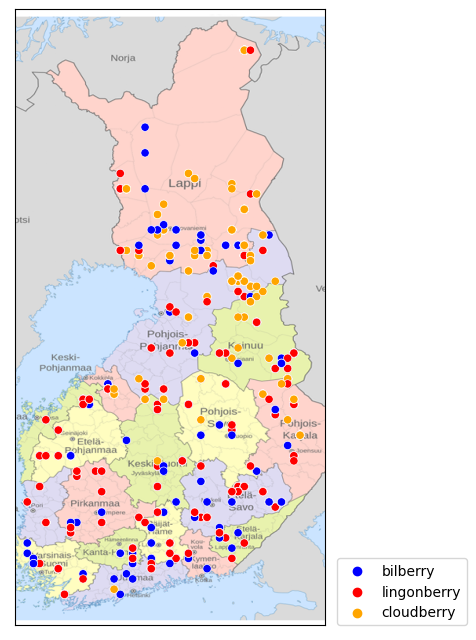

In [34]:
img = plt.imread('../images/visuliazation_page/finlandmapregions.png')
fig, ax = plt.subplots(figsize=(4,8))
sns.scatterplot(x='x', y='y', data=df_berry_weather, hue='berry_type', palette=['blue','red','orange'])
plt.xlim(200000, 700000)
plt.ylim(6600000, 7800000)
plt.legend(loc=(1.04, 0))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.imshow(img, extent=[155000, 760000, 6590000, 7790000], aspect='auto', alpha=1.0)
plt.show()

On the plotted map we can see distribution of the berry types across Finland. Based on this visual information we can make few suggestions:
1. Cloudberry likes to be at Lapland and middle parts of Finland, where the territory is swampy.
2. Lingonberry  prefers southern regions
3. Bilberry can be spotted at the North regions, as well as South, but not in the middle.
4. Disribution between East and West looks balanced.

Let's take a closer look on berries.


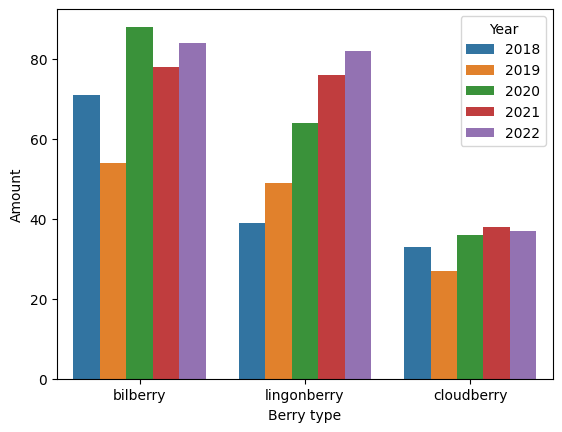

In [35]:
berry_count_plot = sns.countplot(x='berry_type', hue='year', data=df_berry_weather)
berry_count_plot.set_xlabel('Berry type')
berry_count_plot.set_ylabel('Amount')
plt.legend(title = 'Year')


Here is plot with amount of observations of different berries within different year. We can see that in 2019 amount of ripe bilberries and cloudberries noticably decresed, while changes within other years are not so big. Also, in 2019 lingoberry was not affected and amount of the observations keep growing during the whole research.

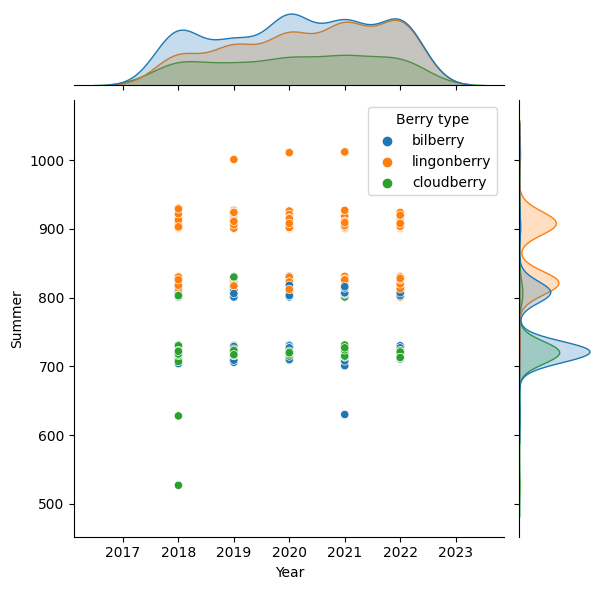

In [36]:
joint_year_time = sns.jointplot(x='year', y='monthday', hue='berry_type', data=df_berry_weather)
plt.legend(title = 'Berry type')
joint_year_time.set_axis_labels("Year", "Summer")


On the plot we can see time periods of observations of the ripe berries grouped by berry type. 

We can clearly see that usually bilberry and cloudberry are tending to get ripe at almost same time of year, in the the end of June - beginning of July. 

Lingonberry is later berry. It starts getting ripe in beginning of August.

There is an interesting year:
    2018 - First ripe cloudberries were spotted already in May, which is almost 1 month earlier than usual, as well as a lot of earlier lingonberries.



So, after taking a look on these plots, we've figured out two slightly different years:

2018 - with it's early ripening of berries

2019 - with decresed amount of cloudberries and bilberries, while lingonberry was not affected at all.

Let's take a closer look on 2018 and 2019, startnig with 2018

Text(0, 0.5, 'Daily temperate')

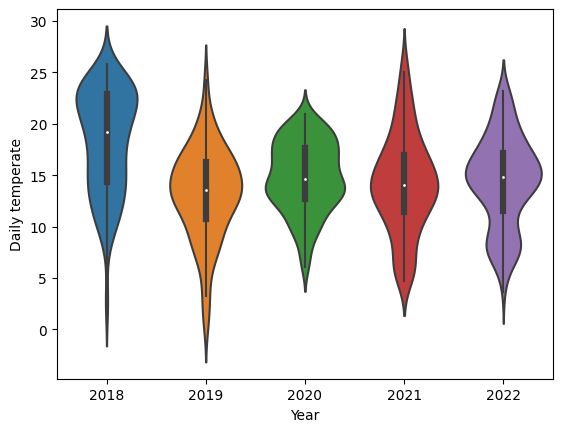

In [37]:
yearly_temp = sns.violinplot(x='year', y='temp', data=df_berry_weather)
yearly_temp.set_xlabel('Year')
yearly_temp.set_ylabel('Daily temperate')

2018 was way more warmer than other years. On the next plot we can also in details see, that starting from July, temperature was really hot. 
2019 has the lowest average temperatures and the greatest number of average temperatures below 5 degrees.
2021 and 2022 have slightly more temperatures between 5 and 10 degrees.

Text(0, 0.5, 'Daily temperature')

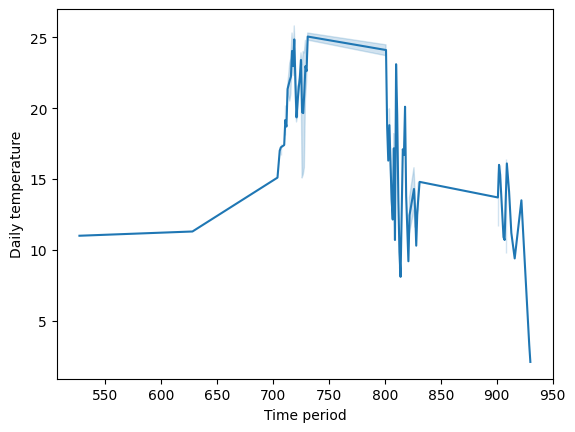

In [38]:
# Temperature of year 2018 
temp_plot_2018 = sns.lineplot(x='monthday', y='temp', data=df_berry_weather[df_berry_weather['year'] == 2018])
temp_plot_2018.set_xlabel('Time period')
temp_plot_2018.set_ylabel('Daily temperature')

Let's take a look on minimal temperature as well

Text(0, 0.5, 'Minimal daily temperature')

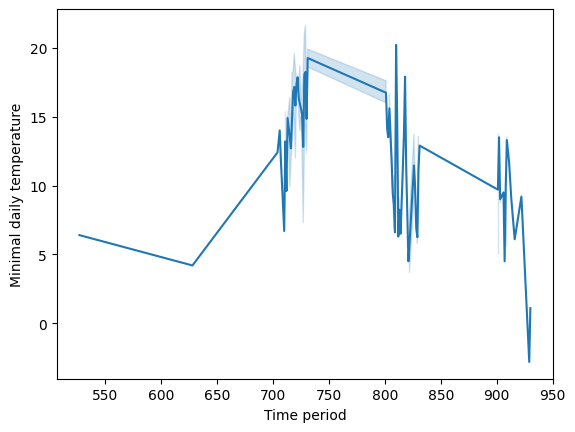

In [39]:
tempmin_2018 = sns.lineplot(x='monthday', y='tempmin', data=df_berry_weather[df_berry_weather['year'] == 2018])
tempmin_2018.set_xlabel('Time period')
tempmin_2018.set_ylabel('Minimal daily temperature')

"The summer of 2018 saw exceptionally high temperatures leading to record-breaking effective temperature sum in large parts of Finland. Years with a similarly warm thermal growing season are expected to become more frequent in the future." © ILARI LEHTONEN, PENTTI PIRINEN
Finnish Meteorological Institute

Let's find out effective temperature sum of the year 2018 and compare it to other years.

"The effective temperature sum, or the growing degree day (GDD) sum is a widely used measure of the intensity of thermal growing season (TGS). TGS is defined to begin when the daily mean temperature rises above a selected threshold (5 °C in Finland) in spring and snow has melted from open areas. In autumn, TGS terminates when daily mean temperature falls permanently below the same threshold. GDD sum is then calculated by summing the daily mean temperature excess above the threshold during TGS."
© ILARI LEHTONEN, PENTTI PIRINEN
Finnish Meteorological Institute

In [40]:
result = []
for year in df_berry_weather['year'].unique():
    # Selecting a year
    df = df_berry_weather[df_berry_weather['year'] == year]
    # Taking into account only days with more than 5 degrees temperature
    df_suitable = df[df['temp'] > 5]
    df_suitable['temp'].count()
    # Calculating effective temperature sum
    temperature_sum = df['temp'].sum() - (df['temp'].count() * 5)
    # Calculating average temperature of days with more than 5 degrees temperature
    average_temp_sum = temperature_sum / df['temp'].count()
    tmp = {'year': year,
              'temperature_sum': temperature_sum,
              'average_temp_sum': average_temp_sum}
    result.append(tmp)
df_avg_temp_sum = pd.DataFrame(result)


Text(0, 0.5, 'Average temperature')

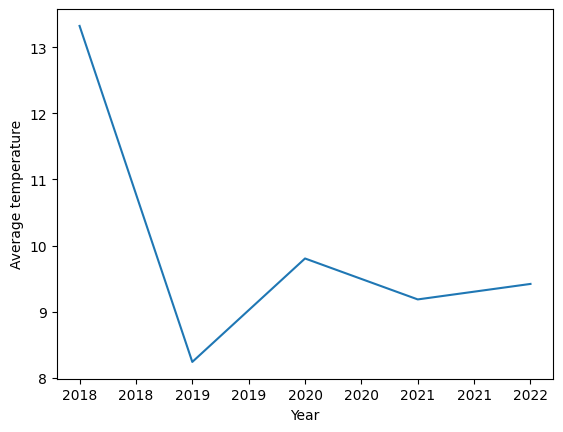

In [41]:
avg_temp_plot = sns.lineplot(x='year', y='average_temp_sum', data=df_avg_temp_sum)
# Fix x-axis step
avg_temp_plot.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
# Set labels
avg_temp_plot.set_xlabel('Year')
avg_temp_plot.set_ylabel('Average temperature')

According to Ilari Lehtonen and Pentti Pirinen, GDD sum in southern Finland varies between 1200 to 1500°C days and 600 to 900 °C days in the North. In 2018 highest GDD sum in Finland was more than 1900°C days which is recordly high.

<b>Based on this information, we can suppose, that greater amount of growing degree days in summer could possibly create better conditions for berries to get ripe earlier, as well as increase the yeild.</b>

Our next question is what happened back in 2019, when yeild of cloudberries and bilberries noticably decreased, but lingoberry actually was not affected at all.


According to the researches there are few things, that can negatively affect growth of represented berries.

Cloudberry doesn't like cloudy days and too much humidity, as well as supersensitive to subzero temperatures.

Bilberry otherwise typically grow in shadowy locations. Too dry summer could be harmful as well as subzero temperatures.

Lingonberry likes the sun and not so sensitive to subzero temperatures.


So, the things we are going to look into are humidity, cloudcover and minimal temperature.

<h1>Humidity</h1>

<AxesSubplot: xlabel='year', ylabel='humidity'>

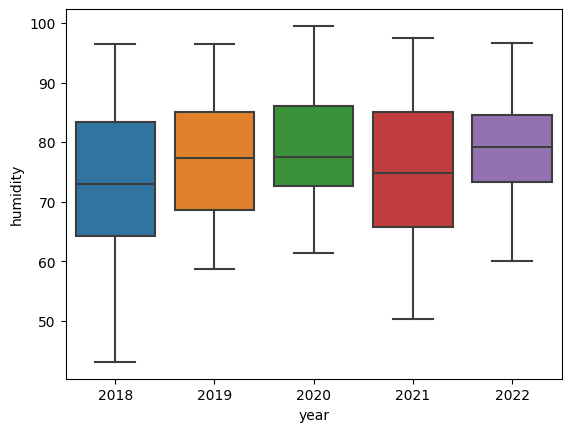

In [42]:
sns.boxplot(x='year', y='humidity', data=df_berry_weather)

2019 humidity doesn't look somehow extremely different to other years. The most common values are in between 70% and 80%, average humidity on the same level as 2020 and 2022. Also cloudberry and bilberry would be affected by humidity in opposite ways since first doesn't like too much humidity while second doesn't like dry weather. 

But the interesting thing here is that humidity level of year 2021 is a little bit lower than 2020 and 2022, which in a complex cloudcover (see next plot) could negatively affect growth of bilberies. 

If we've already started to speak about humidity, let's take a look on historical data on rains.

Explanations of the columns: 

precip – the amount of liquid precipitation that fell or is predicted to fall in the period. This includes the liquid-equivalent amount of any frozen precipitation such as snow or ice.

precipcover (days only) – the proportion of hours where there was non-zero precipitation

precipprob (forecast only) – the likelihood of measurable precipitation ranging from 0% to 100%

In [43]:
# data frame with average precip per year
avg_precip = []
for year in df_berry_weather['year'].unique():
    tmp = [year, df_berry_weather[df_berry_weather['year'] == year]['precip'].mean(), df_berry_weather[df_berry_weather['year'] == year]['precipcover'].mean(), df_berry_weather[df_berry_weather['year'] == year]['precipprob'].mean()]
    avg_precip.append(tmp)
avg_precip = pd.DataFrame(avg_precip,columns=['year', 'avg_precip', 'avg_cover', 'avg_prob'])


Text(0, 0.5, 'Precipitation')

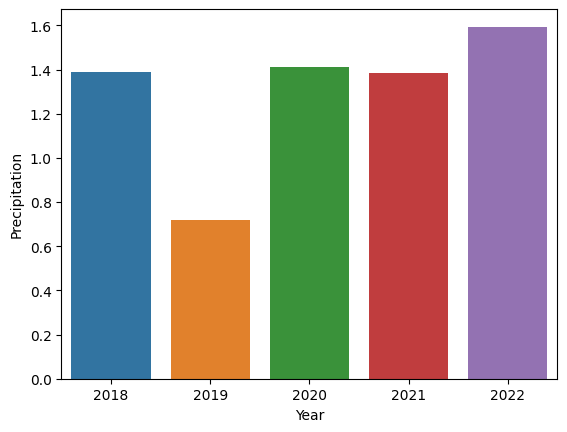

In [44]:
rains_bar = sns.barplot(x='year', y='avg_precip', data=pd.DataFrame(avg_precip))
rains_bar.set_xlabel('Year')
rains_bar.set_ylabel('Precipitation')



While the overall air humidity of 2019 was on the almsot same level with other years(and, for example, even greater than 2018) we can see that average level of precipitation in 2019 was more than 2 times lower compared to other years.

As we remember, too dry summer could be harmful for bilberries which partially could explain bilberry yield decrease in 2019.

<h1>Cloudcover</h1>

<AxesSubplot: xlabel='year', ylabel='cloudcover'>

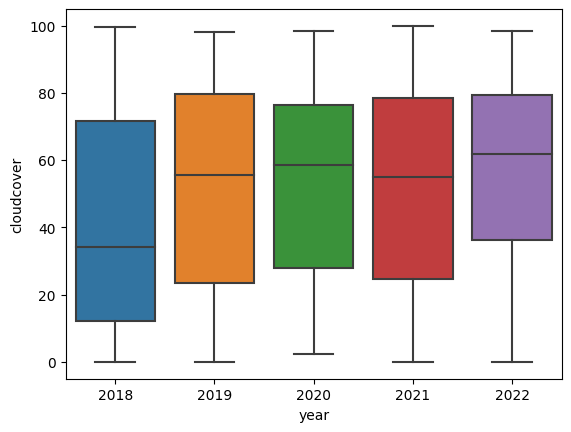

In [45]:
sns.boxplot(x='year', y='cloudcover', data=df_berry_weather)

2019 Cloud cover has huge differencies with 2018. Bigger cloud cover means less sun. So it could have affected cloudberries and explain 2019 cloudberry collapse. 
Also 2021 has slightly increase in cloud cover compared with 2020 and 2022. 

<h1>Minimal temperature</h1>

On previous plots with temperatures we already could have noticed, that 2019 was generally colder than other years, and it had more days with temperature close to zero

<AxesSubplot: xlabel='year', ylabel='tempmin'>

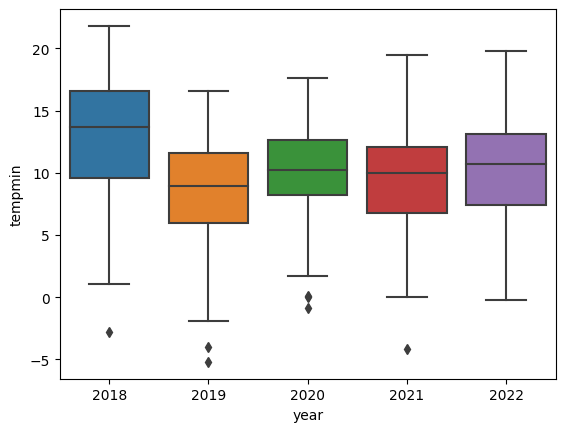

In [46]:
sns.boxplot(x='year', y='tempmin', data=df_berry_weather)


Yes, 2019 is the only year with average minimal temperature less than 10 degrees. We are also able to see few outliers with negative temperature. 
On the second place is 2021, which were slightly colder than 2020 and 2022.

Text(0, 0.5, 'Minimal temperature')

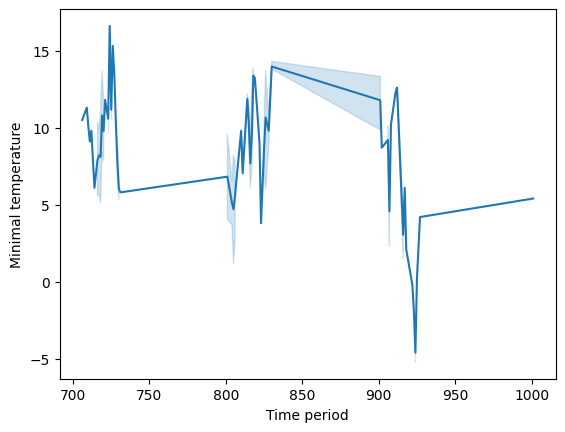

In [47]:
mintemp_line_2019 = sns.lineplot(x='monthday', y='tempmin', data=df_berry_weather[df_berry_weather['year'] == 2019])
mintemp_line_2019.set_xlabel('Time period')
mintemp_line_2019.set_ylabel('Minimal temperature')


<b>There are a lot of days with subzero temperature, that could affect reduced growth of both cloudberries and bilberries. And as we already know, subzero temperatures doesn't heavily affect lingoberries.</b>



The other thing that can inderictly tell us that during 2019 there were a lot of colder days and freezing nights is dew. 

"Dew is the result of water changing from vapor to liquid. It usually forms as temperature drop and objects cool down.  Colder air is less able to hold water vapor than warm air. This forces water vapor in the air around cooling objects to condense. 

Cold weather can also prevent the formation of dew. As temperatures drop below freezing (0°Celsius), a region may reach its frost point. At a frost point, water vapor does not condense. It sublimates, or changes directly from a gas to a solid. Moisture changes from water vapor to ice."

https://education.nationalgeographic.org/resource/dew/

<AxesSubplot: xlabel='year', ylabel='dew'>

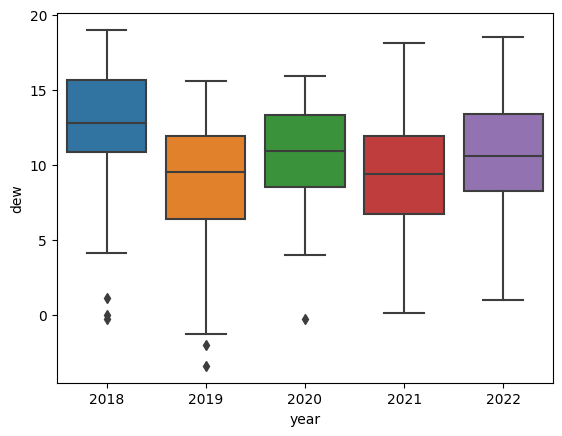

In [48]:
sns.boxplot(x='year', y='dew', data=df_berry_weather)

Despite that 2019 had more humidity than 2018 and about the same amount as 2020, 2019 seems to had less dew. That could tell us that during a lot of freezing nights ice formed instead of the dew.

Conclusion: 
We can observe that temperature strongly affects ripeness process. Warmer temperatures at the beginning of the summer can provoke berries to flower and get ripe earlier. Perfect example is 2018, when the average temperature was more than 10 degrees starting from May.

Colder temperatures or night subzero temperatures can affect negatively on ripening. We could see it at 2019, when there were a lot of freezing nights, and generally temperature were lower. Also we could see that the lower temperature is the more berries it could affect. For example, 2019 cloudberry and bilberry got heavily affected while in 2021 and 2022 only bilberries were slightly affected.

Humidity, precipitation and cloudcover are able to affect positively or negatively, but the change should be either complex or just huge. We could see that in 2021 slightly lower humidity and slightly lower cloud coverage in a complex with lower temperatures affected some of the berries. And in 2019 lower temperatures and huge difference (more than 2 times less) in average percipitation heavily affected bilberries.

One more thing that might've had influence on ripeness is <b>pollinators</b>.

Ideal palces for pollinating insects are warm, sunny and sheltered from wind areas. 

Based on our conclusion ,especiaalyl on years 2018 and 2019, I suppose, that weather conditions affect pollinators as well, and they in turn affect ripeness of berries.

Let's check out does if the wind somehow inderectly affect berries:


<AxesSubplot: xlabel='year', ylabel='windspeed'>

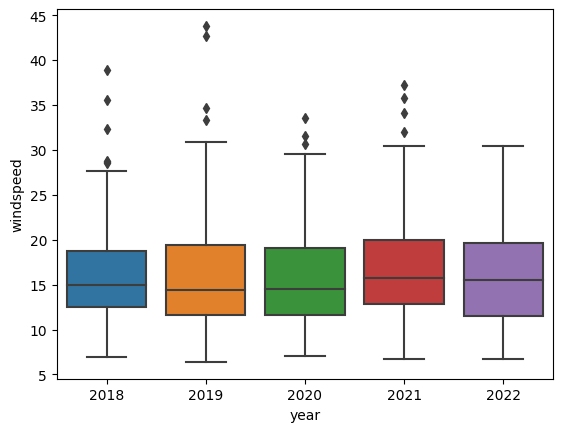

In [49]:
sns.boxplot(x='year', y='windspeed', data=df_berry_weather)

The average wind speed is almost the same amongst the different years. 2019 still has few outliers on upper part. Let's check if the strongest winds were at the beginning of the summer and if they could somehow affect pollinators' activity during the flowering season.

<AxesSubplot: xlabel='monthday', ylabel='windspeed'>

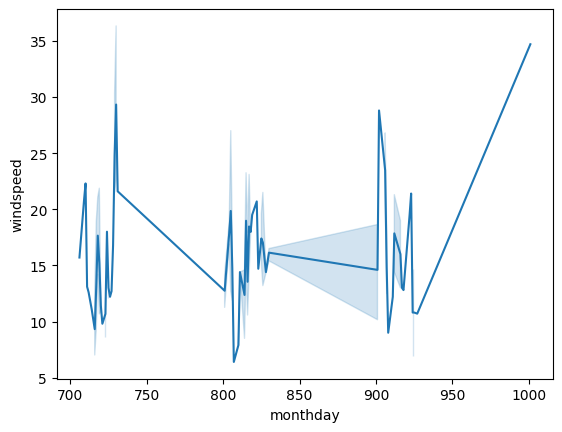

In [50]:
# Year 2019
sns.lineplot(x='monthday', y='windspeed', data=df_berry_weather[df_berry_weather['year'] == 2019])

Doesn't seem like wind speed have affected berries. In the first weeks of June there were some winds, but their speed is close to average. 

Let's compare to 2018

<AxesSubplot: xlabel='monthday', ylabel='windspeed'>

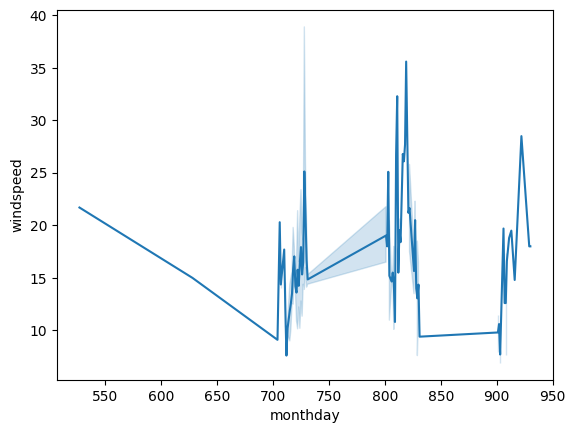

In [51]:
# Year 2018
sns.lineplot(x='monthday', y='windspeed', data=df_berry_weather[df_berry_weather['year'] == 2018])

Almost same June's trend in 2018.

Wind direction might also have influence. Basically my idea is that wind coming from North to South can bring colder air and affect Southern Finland species that prefer warmer conditions.


<a href="https://www.researchgate.net/figure/Map-showing-wind-directions-from-0-to-360_fig2_282975836"><img src="https://www.researchgate.net/profile/Venkata-Mandla/publication/282975836/figure/fig2/AS:286230597779457@1445254100788/Map-showing-wind-directions-from-0-to-360.png" alt="Map showing wind directions from 0 ◦ to 360 ◦ ."/></a>

<AxesSubplot: xlabel='year', ylabel='winddir'>

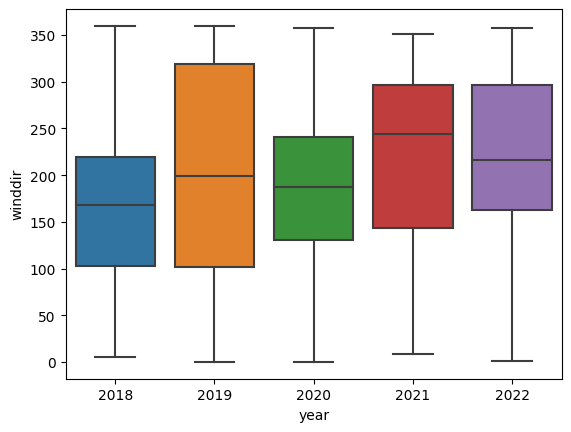

In [52]:
sns.boxplot(x='year', y='winddir', data=df_berry_weather)

The other thing that could've affect pollinators is light pollution. There are studies that say that artificial light at night disrupts pollinators' circadian rhytms as well as their life patterns.

https://www.nature.com/articles/nature23288

<a href="https://www.lightpollutionmap.info/#zoom=4.41&lat=62.4868&lon=22.9037&state=eyJiYXNlbWFwIjoiTGF5ZXJCaW5nUm9hZCIsIm92ZXJsYXkiOiJ3YV8yMDE1Iiwib3ZlcmxheWNvbG9yIjpmYWxzZSwib3ZlcmxheW9wYWNpdHkiOjYwLCJmZWF0dXJlc29wYWNpdHkiOjg1fQ==">Light pollution map</a> Tells us that in 2019 artificial light's raddiance sum is aproximately 660,000 while in 2018 500,000 and 540,000 in 2020.

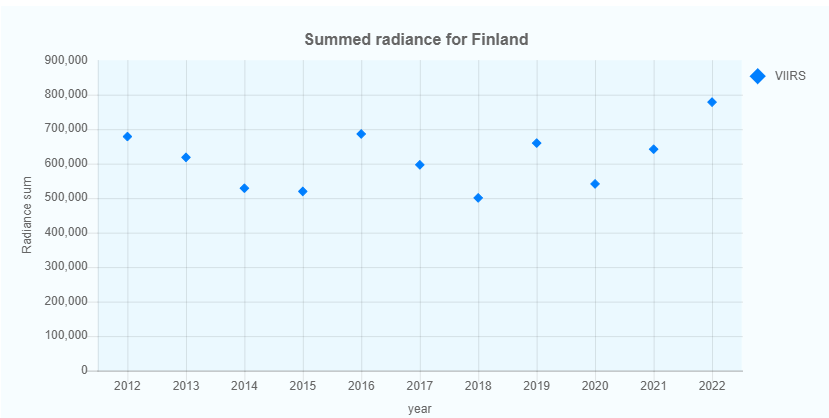

However there are few problems with this data:
1. It shows radiance sum per year, while the only periood we need is summer.
2. Since summer in Finland is quite bright anyways because of the long sunlight day, I don't think that some artificial lights during summer could heavily affect pollinators. But it might be a problem for Southern countries, where pollinators are present during the whole year and day and night rhytm is more clear.
3. A large part of Finland lies at latitudes where high aurora activity is present which can have a strong influence on radiance values
4. Even if the radiance values are high near the cities, most part of the country is still not affected by artificial lights due to population density

Year 2018 (on the left) VS 2019 (on the right).

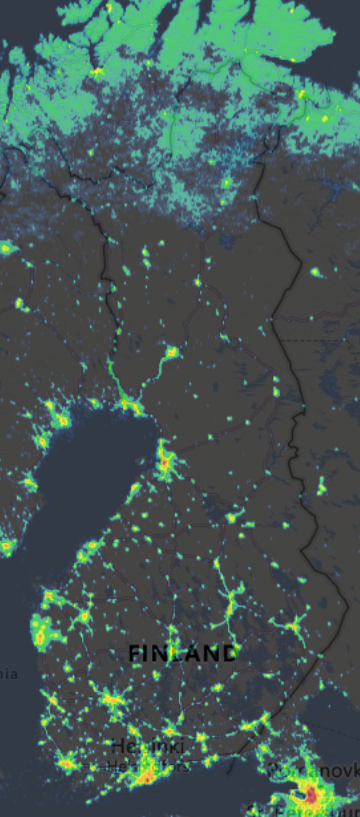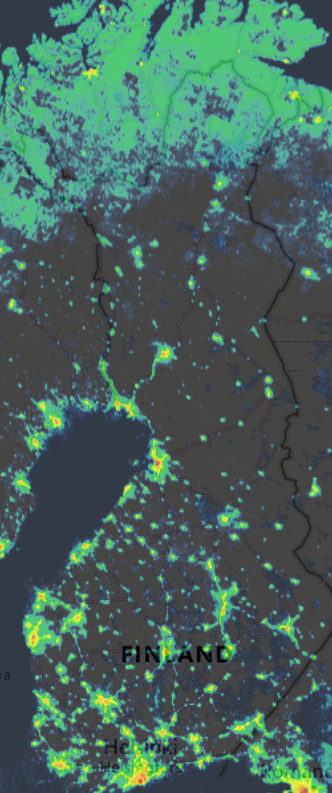

<h1>Altitude</h1>

<AxesSubplot: xlabel='berry_type', ylabel='altitude'>

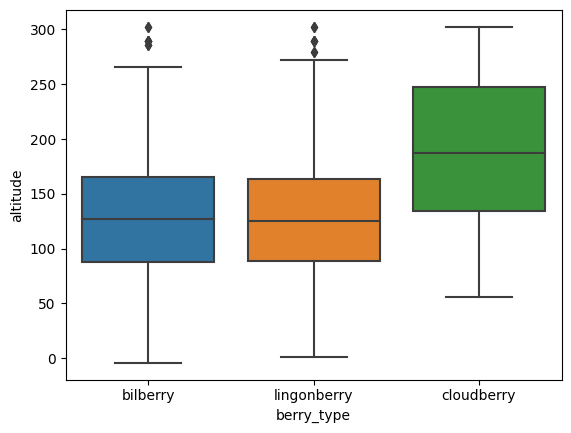

In [53]:
sns.boxplot(x='berry_type', y='altitude', data = df_berry_weather)